Heart Failure Prediction

In [18]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable

# get the output for all commands
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from mlxtend.plotting import plot_decision_regions

In [19]:
df = pd.read_csv(r"C:\Users\palla\OneDrive\Documents\heart.csv")

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df.shape

(918, 12)

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

# Data cleaning

## Checking duplicates

In [6]:
df.duplicated()
df.duplicated().value_counts()

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool

False    918
dtype: int64

## Missing values

In [7]:
df.isna()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Identify corrupted data

In [9]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Univariate analysis

In [10]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [11]:
# Some object columns are missing, we have to include it.
df.describe(include=['object'])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='Cholesterol', ylabel='Count'>

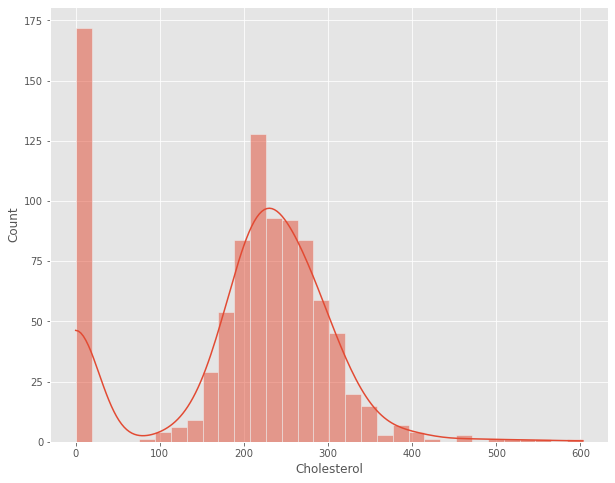

In [12]:
#Plotting the continuous column using Distribution Plot
plt.figure(figsize=(10,8))
plt.style.use('ggplot')
sns.histplot(df.Cholesterol, kde=True)

<Figure size 576x432 with 0 Axes>

<AxesSubplot:xlabel='ChestPainType', ylabel='Count'>

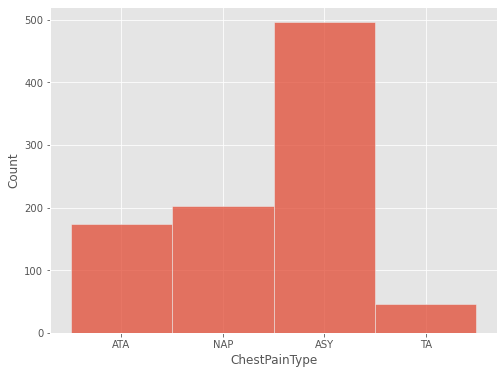

In [13]:
## plotting categorical columns
plt.figure(figsize=(8,6))
sns.histplot(df.ChestPainType)

- `TA` is less chestpain type compare to other chestpain types in given dataset

# Bivariate analysi

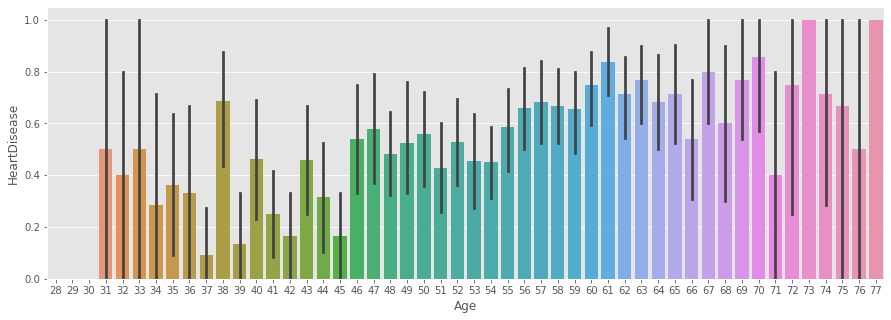

In [14]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'Age' , y ='HeartDisease' , data = df);

<Figure size 432x360 with 0 Axes>

<AxesSubplot:xlabel='HeartDisease', ylabel='Oldpeak'>

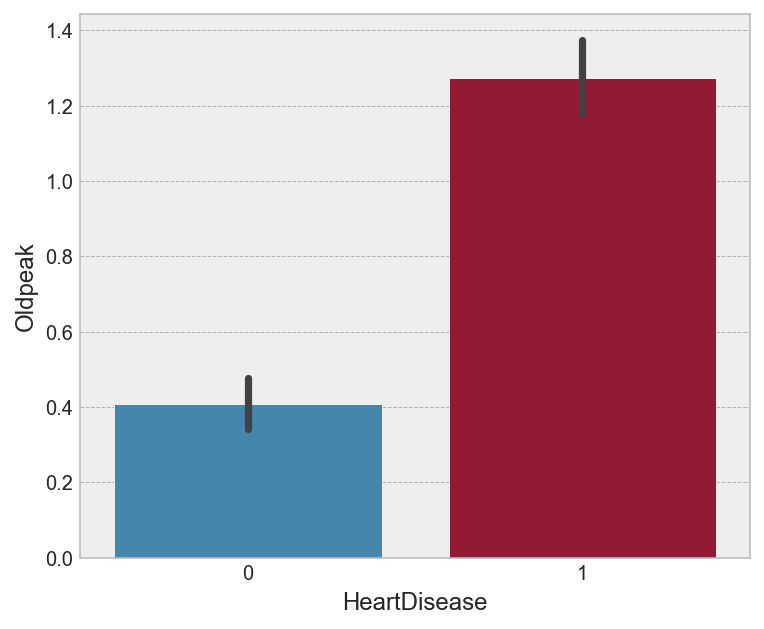

In [69]:
plt.figure(figsize=(6,5))
plt.grid(True)
sns.barplot(x =df.HeartDisease, y = df.Oldpeak)

- Comparing heartdisease and oldpeak normal(0) is less where the heartdiseas(1) value is more

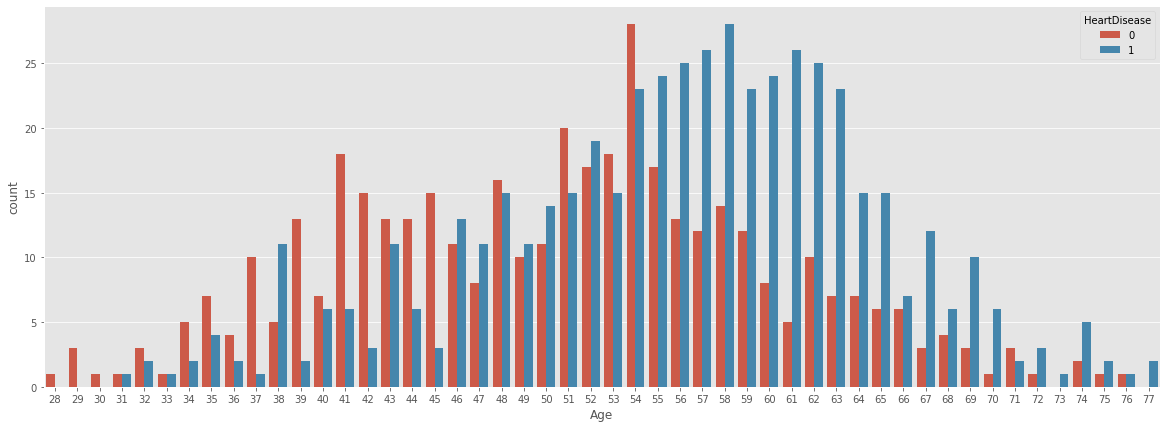

In [16]:
plt.figure(figsize=(20,7))
sns.countplot(x = 'Age',hue = 'HeartDisease', data = df);

## Multivariate analysis

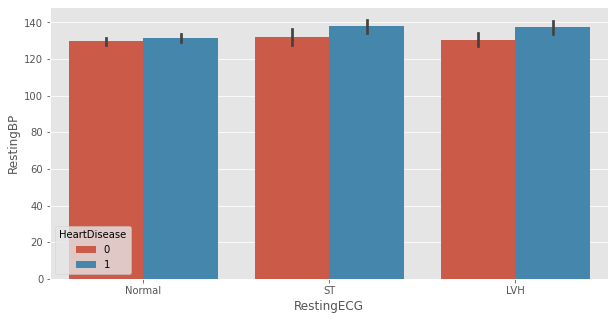

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(x='RestingECG',y='RestingBP',hue='HeartDisease',data=df);

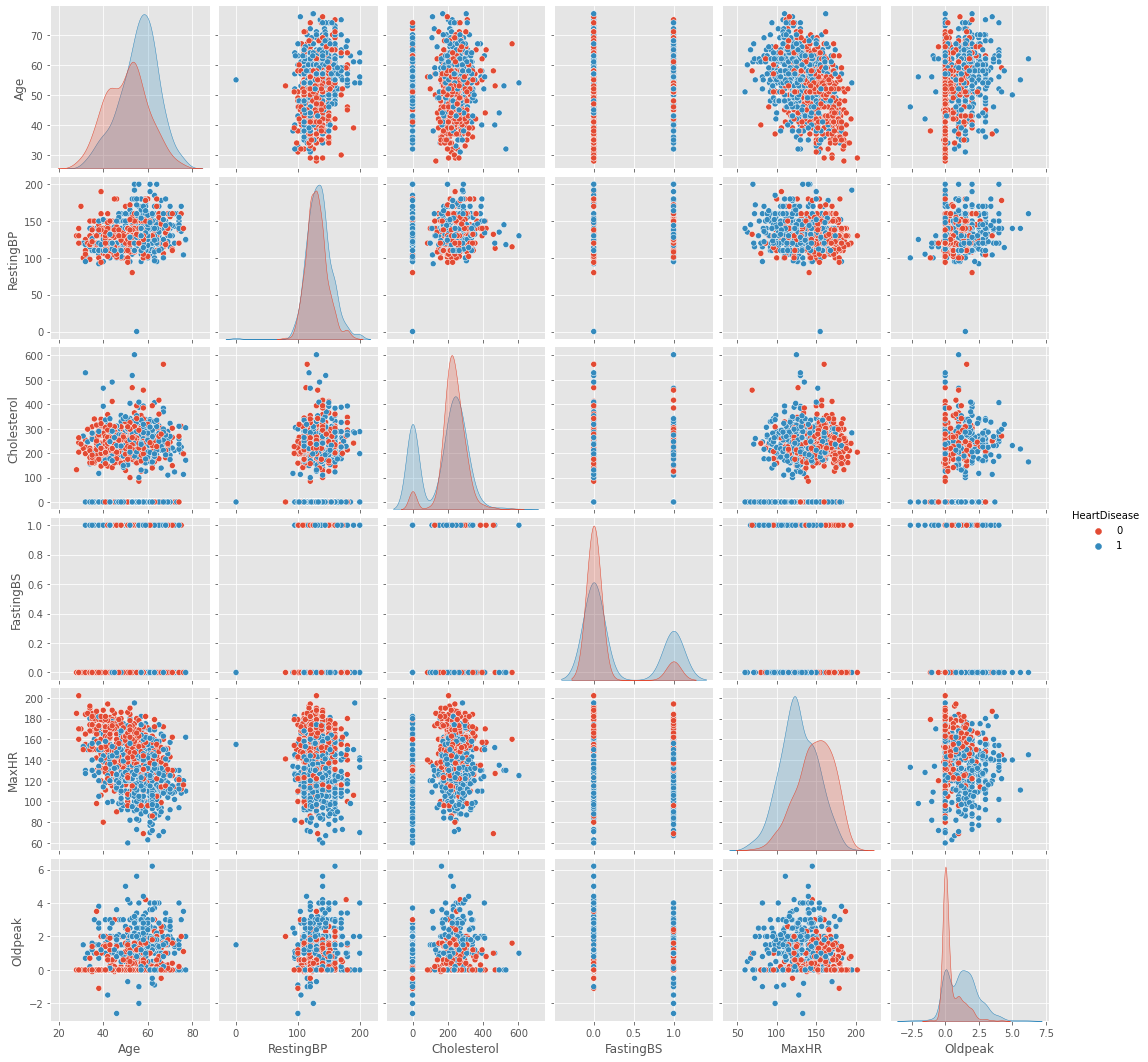

In [18]:
sns.pairplot(df,hue='HeartDisease');

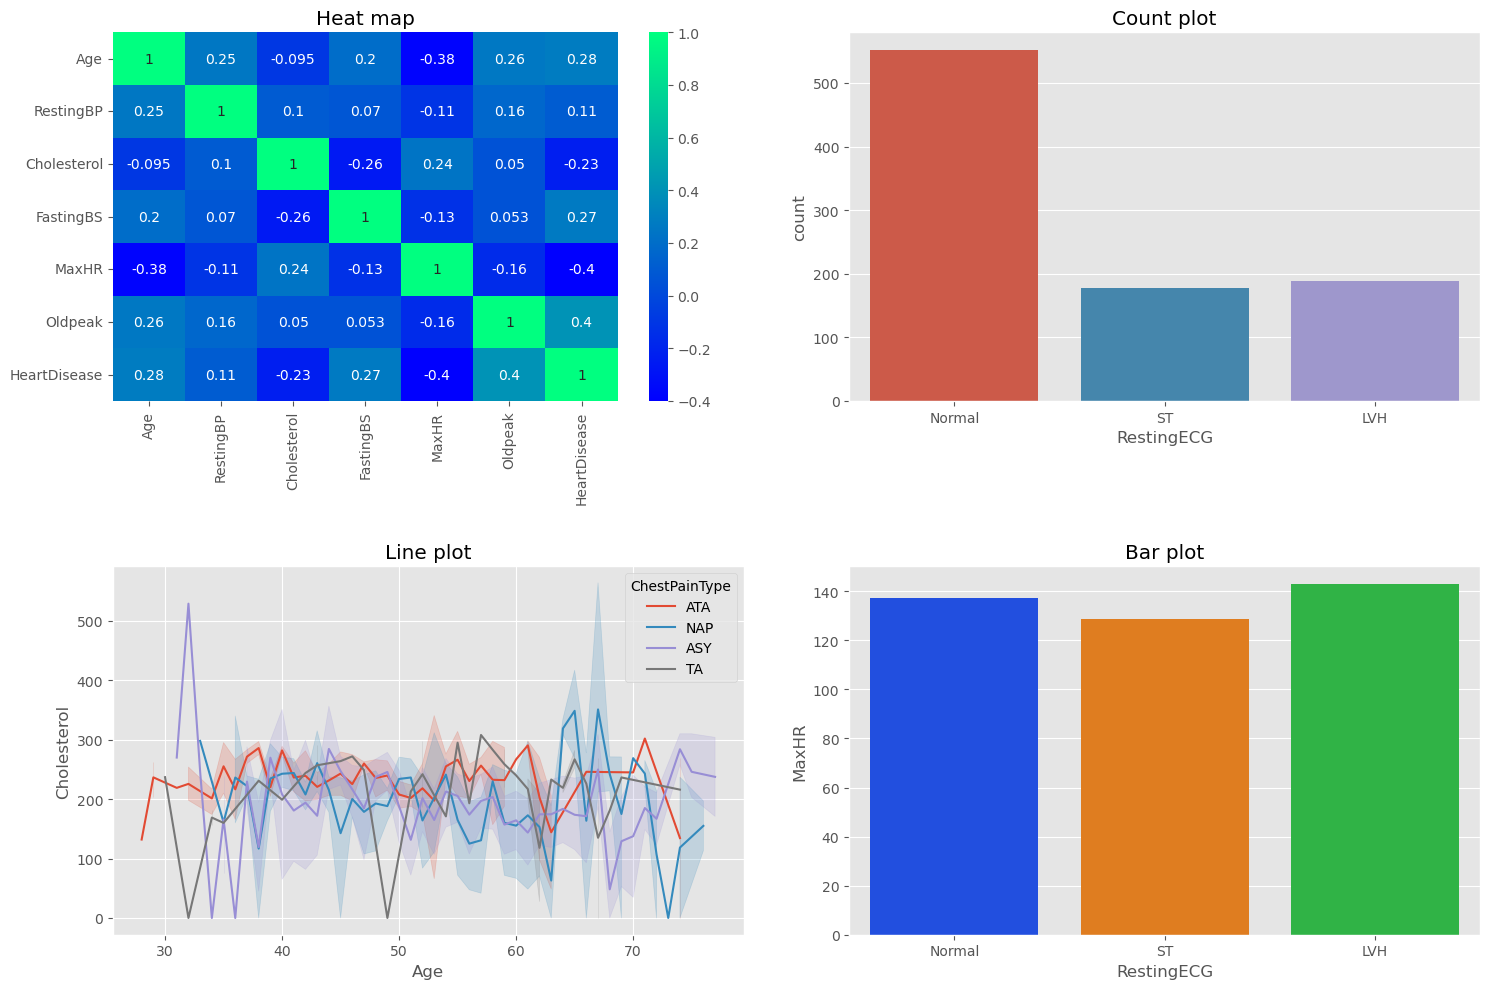

In [19]:
## Different types of plots 

plt.figure(dpi = 100, figsize=(15,10))

plt.subplot(221)
sns.heatmap(df.corr(), cmap = 'winter', annot=True)
plt.title('Heat map')

plt.subplot(222)
sns.countplot(data = df, x = 'RestingECG')
plt.title('Count plot')

plt.subplot(223)
sns.lineplot(data = df, x = 'Age', y = 'Cholesterol', hue= 'ChestPainType');
plt.title('Line plot')

plt.subplot(224)
sns.barplot(data = df, x = 'RestingECG', y = 'MaxHR', ci = None, palette='bright')
plt.title('Bar plot')

# plt.tight_layout();
plt.tight_layout(h_pad = 2.8, w_pad = 3.5);

## Checking outliers

In [20]:
df.skew()

Age            -0.195933
RestingBP       0.179839
Cholesterol    -0.610086
FastingBS       1.264484
MaxHR          -0.144359
Oldpeak         1.022872
HeartDisease   -0.215086
dtype: float64

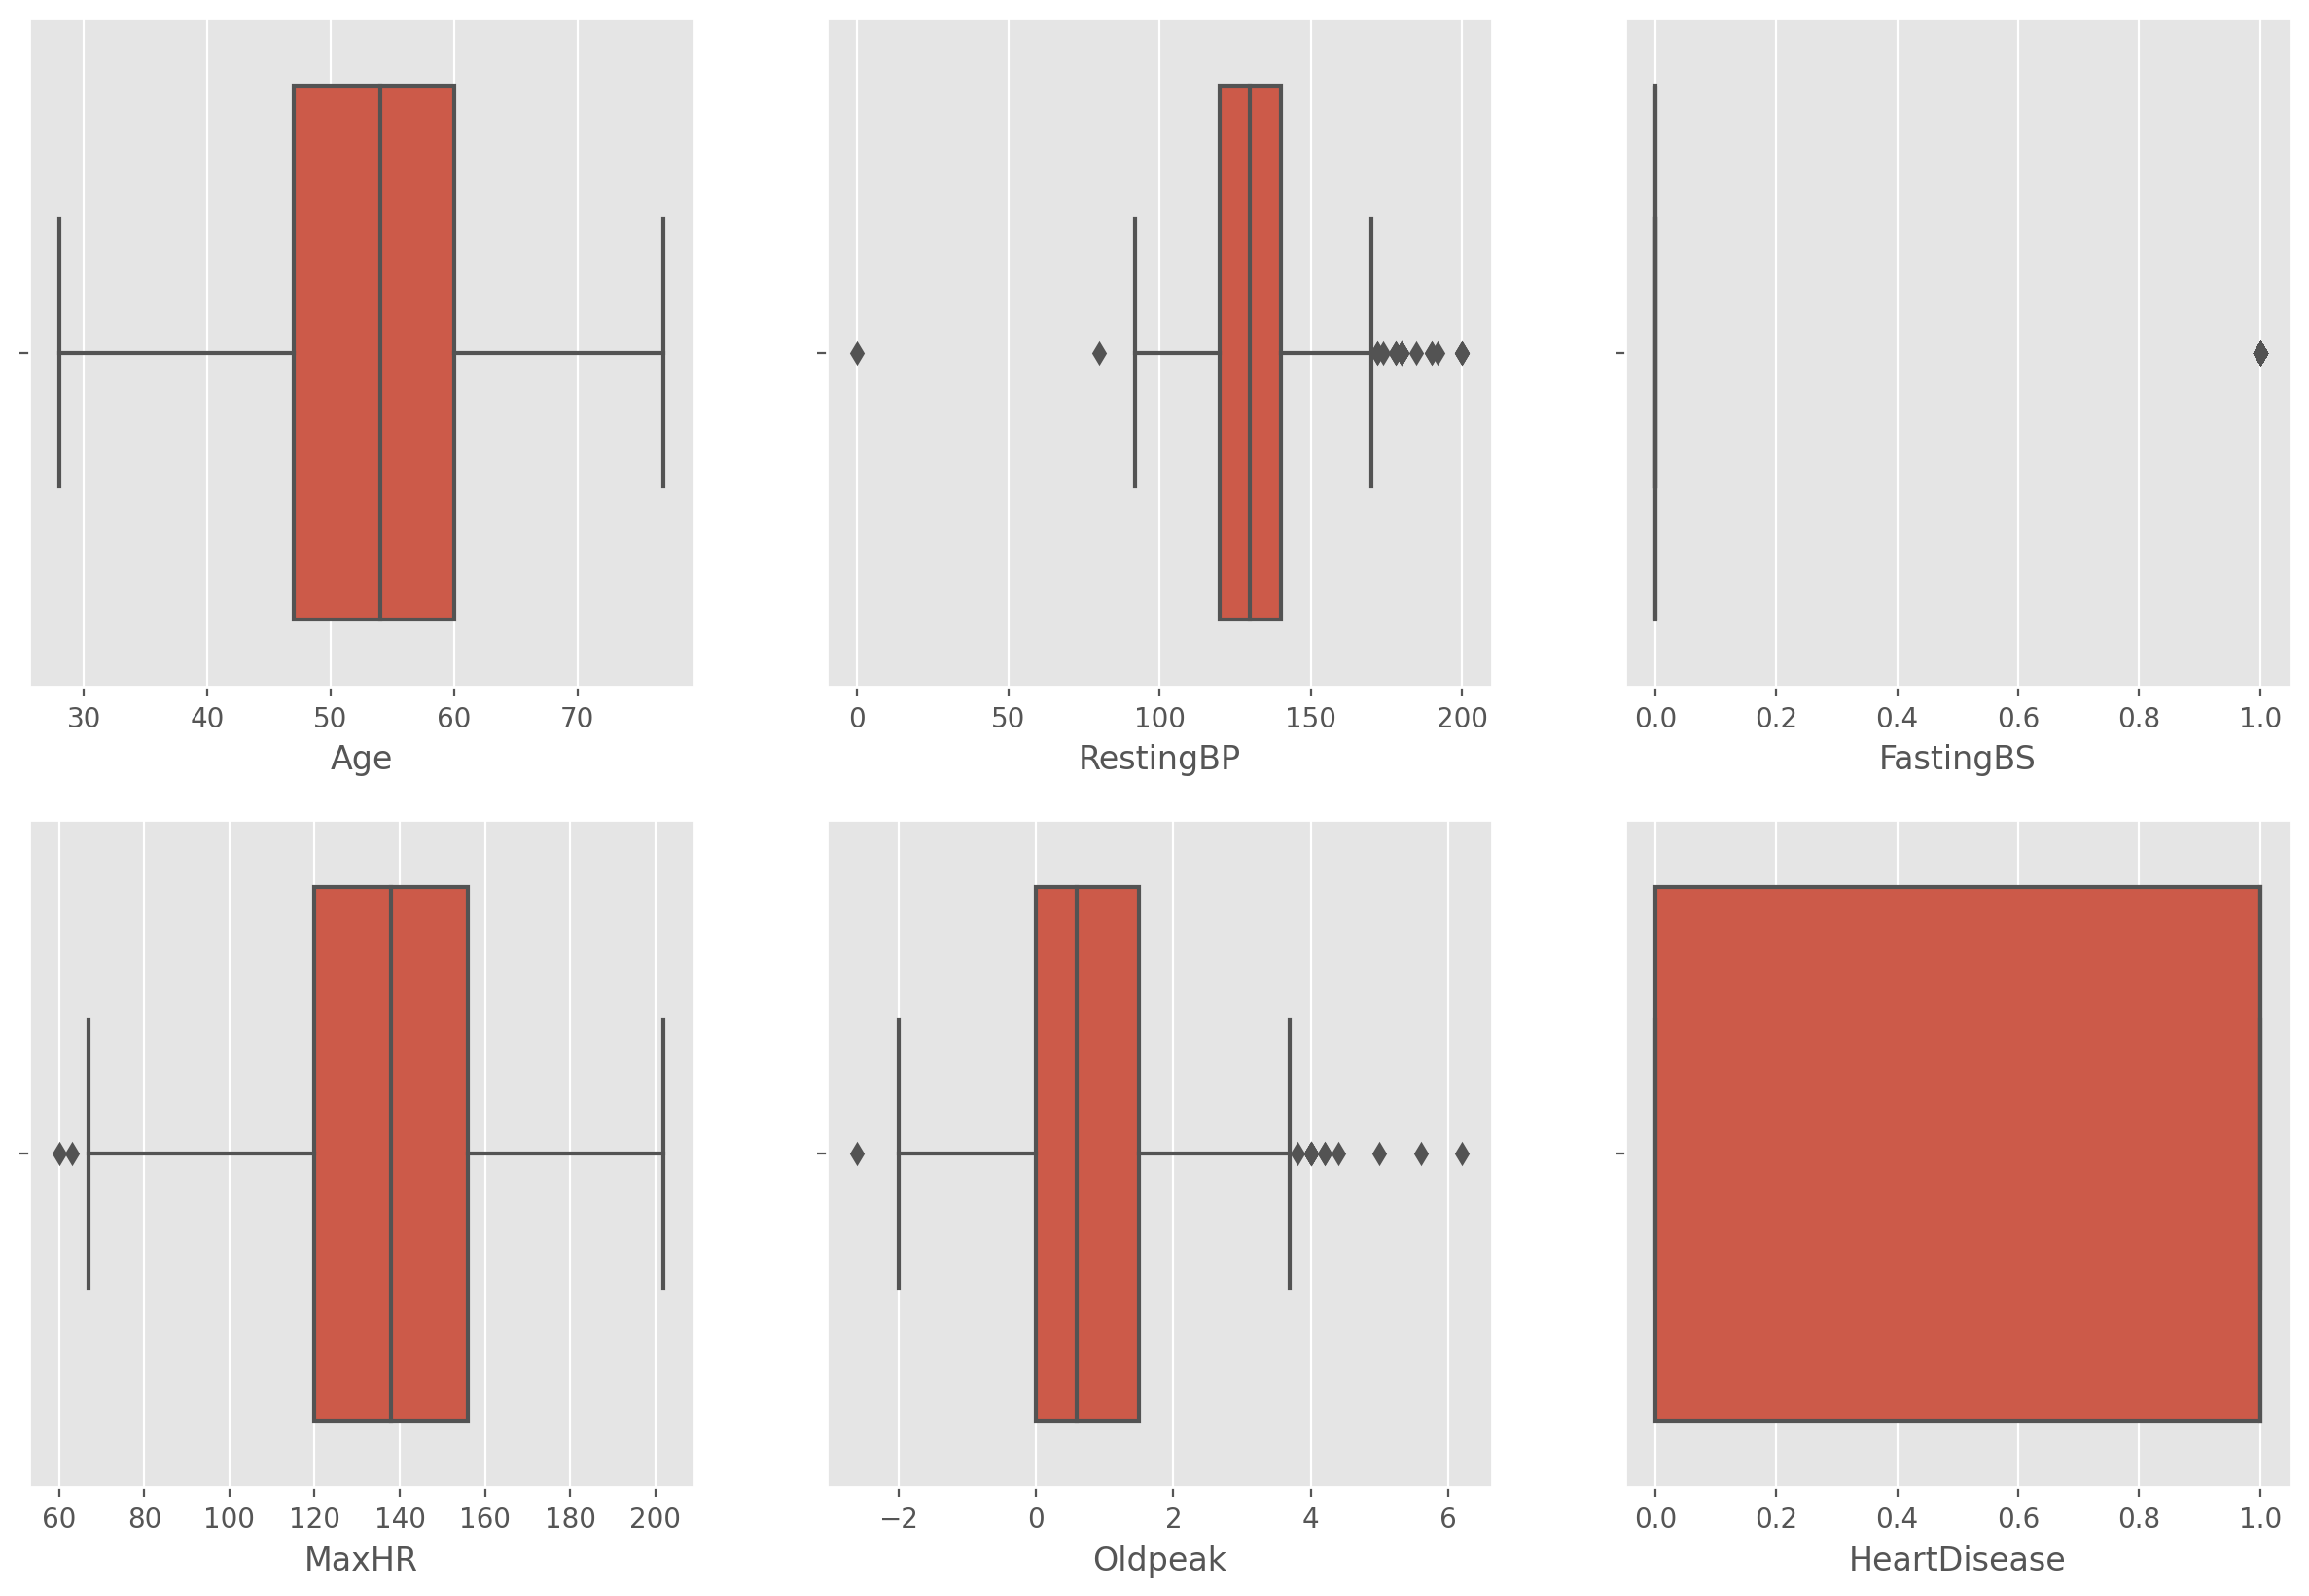

In [21]:
## Box plot
plt.figure(figsize=(15,10), dpi = 200)
plt.subplot(231)
sns.boxplot(x = 'Age', data = df)
plt.subplot(232)
sns.boxplot(x = 'RestingBP', data = df)
plt.subplot(233)
sns.boxplot(x = 'FastingBS', data = df)
plt.subplot(234)
sns.boxplot(x = 'MaxHR', data = df)
plt.subplot(235)
sns.boxplot(x = 'Oldpeak', data = df)
plt.subplot(236)
sns.boxplot(x = 'HeartDisease', data = df);

In [22]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## Treating outliers

In [20]:
df1 = df[df.FastingBS<150]

In [21]:
df1 = df[df.Oldpeak<4]

In [22]:
df1.reset_index(inplace = True)

In [23]:
df1.drop('index', axis =1, inplace = True)

In [24]:
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
899,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
900,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
901,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
902,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Coverting categorical to numerical

In [27]:
df1['Sex'].unique()
df1['Sex'].value_counts()

array(['M', 'F'], dtype=object)

M    714
F    190
Name: Sex, dtype: int64

In [28]:
df1['ChestPainType'].unique()
df1['ChestPainType'].value_counts()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

ASY    483
NAP    203
ATA    173
TA      45
Name: ChestPainType, dtype: int64

In [29]:
df1['RestingECG'].unique()
df1['RestingECG'].value_counts()

array(['Normal', 'ST', 'LVH'], dtype=object)

Normal    548
LVH       183
ST        173
Name: RestingECG, dtype: int64

In [30]:
df1['ExerciseAngina'].unique()
df1['ExerciseAngina'].value_counts()

array(['N', 'Y'], dtype=object)

N    543
Y    361
Name: ExerciseAngina, dtype: int64

In [31]:
df1['ST_Slope'].unique()
df1['ST_Slope'].value_counts()

array(['Up', 'Flat', 'Down'], dtype=object)

Flat    456
Up      394
Down     54
Name: ST_Slope, dtype: int64

In [33]:
#converting categorical column into numerical
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df1["Sex"] = LE.fit_transform(df1[["Sex"]])
df1["ChestPainType"] = LE.fit_transform(df1[["ChestPainType"]])
df1["RestingECG"] = LE.fit_transform(df1[["RestingECG"]])
df1["ExerciseAngina"] = LE.fit_transform(df1[["ExerciseAngina"]])
df1["ST_Slope"] = LE.fit_transform(df1[["ST_Slope"]])

In [34]:
df1.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
899,45,1,3,110,264,0,1,132,0,1.2,1,1
900,68,1,0,144,193,1,1,141,0,3.4,1,1
901,57,1,0,130,131,0,1,115,1,1.2,1,1
902,57,0,1,130,236,0,0,174,0,0.0,1,1
903,38,1,2,138,175,0,1,173,0,0.0,2,0


In [35]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [36]:
# CORRELATION
correlation = df1.corr()
correlation

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.057372,-0.072160,0.253172,-0.102323,0.199539,-0.006317,-0.386080,0.213948,0.252185,-0.258826,0.278095
Sex,0.057372,1.000000,-0.130461,0.015457,-0.200827,0.125324,0.060140,-0.187225,0.187782,0.120613,-0.157587,0.311128
ChestPainType,-0.072160,-0.130461,1.000000,-0.019379,0.074018,-0.074951,-0.068427,0.288358,-0.349989,-0.162459,0.208969,-0.378878
RestingBP,0.253172,0.015457,-0.019379,1.000000,0.096005,0.066524,0.036936,-0.111317,0.152553,0.138275,-0.057043,0.104084
Cholesterol,-0.102323,-0.200827,0.074018,0.096005,1.000000,-0.262189,-0.200710,0.239514,-0.038352,0.025179,0.130008,-0.242229
FastingBS,0.199539,0.125324,-0.074951,0.066524,-0.262189,1.000000,0.088819,-0.133943,0.060455,0.072515,-0.183105,0.272323
RestingECG,-0.006317,0.060140,-0.068427,0.036936,-0.200710,0.088819,1.000000,-0.176089,0.071971,-0.021982,-0.003671,0.054817
MaxHR,-0.386080,-0.187225,0.288358,-0.111317,0.239514,-0.133943,-0.176089,1.000000,-0.367656,-0.163812,0.347825,-0.400622
ExerciseAngina,0.213948,0.187782,-0.349989,0.152553,-0.038352,0.060455,0.071971,-0.367656,1.000000,0.421129,-0.431833,0.491579
Oldpeak,0.252185,0.120613,-0.162459,0.138275,0.025179,0.072515,-0.021982,-0.163812,0.421129,1.000000,-0.476492,0.404328


<Figure size 720x576 with 0 Axes>

<AxesSubplot:>

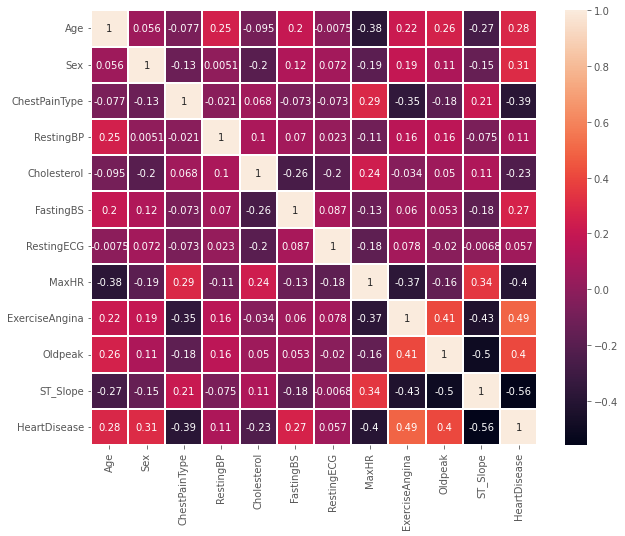

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,linewidths=0.2)

In [37]:
df1.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

# Split into tarin and test

In [4]:
y = df1['HeartDisease']
X = df1[['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR',
        'ExerciseAngina','Oldpeak','ST_Slope']]

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [6]:
#Standardization
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_trans = std.fit_transform(X_train)
X_test_trans = std.transform(X_test)

# Build the neural networks

In [105]:
model = Sequential()
model.add(Dense(70,activation='relu',kernel_initializer='he_normal',input_dim=11))
model.add(Dropout(0.25))
model.add(Dense(65,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(45,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(35,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [106]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 70)                840       
                                                                 
 dropout_27 (Dropout)        (None, 70)                0         
                                                                 
 dense_66 (Dense)            (None, 65)                4615      
                                                                 
 dropout_28 (Dropout)        (None, 65)                0         
                                                                 
 dense_67 (Dense)            (None, 50)                3300      
                                                                 
 dropout_29 (Dropout)        (None, 50)                0         
                                                                 
 dense_68 (Dense)            (None, 45)               

# Compile the model

In [107]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [108]:
history = model.fit(X_train_trans,y_train,batch_size=10,epochs=150,validation_split=0.2)

Epoch 1/150
66/66 [==============================] - 3s 7ms/step - loss: 0.6958 - accuracy: 0.5167 - val_loss: 0.6924 - val_accuracy: 0.5301
Epoch 2/150
66/66 [==============================] - 0s 4ms/step - loss: 0.6916 - accuracy: 0.5636 - val_loss: 0.6919 - val_accuracy: 0.5301
Epoch 3/150
66/66 [==============================] - 0s 4ms/step - loss: 0.6900 - accuracy: 0.5576 - val_loss: 0.6916 - val_accuracy: 0.5301
Epoch 4/150
66/66 [==============================] - 0s 5ms/step - loss: 0.6883 - accuracy: 0.5742 - val_loss: 0.6860 - val_accuracy: 0.5663
Epoch 5/150
66/66 [==============================] - 0s 5ms/step - loss: 0.6807 - accuracy: 0.6061 - val_loss: 0.6482 - val_accuracy: 0.7530
Epoch 6/150
66/66 [==============================] - 0s 5ms/step - loss: 0.6387 - accuracy: 0.7076 - val_loss: 0.5529 - val_accuracy: 0.8313
Epoch 7/150
66/66 [==============================] - 0s 5ms/step - loss: 0.6129 - accuracy: 0.7606 - val_loss: 0.5859 - val_accuracy: 0.7711
Epoch 8/150
6

Epoch 59/150
66/66 [==============================] - 0s 4ms/step - loss: 0.3199 - accuracy: 0.8803 - val_loss: 0.3702 - val_accuracy: 0.8554
Epoch 60/150
66/66 [==============================] - 0s 4ms/step - loss: 0.3253 - accuracy: 0.8818 - val_loss: 0.3676 - val_accuracy: 0.8373
Epoch 61/150
66/66 [==============================] - 0s 4ms/step - loss: 0.3162 - accuracy: 0.8970 - val_loss: 0.3575 - val_accuracy: 0.8494
Epoch 62/150
66/66 [==============================] - 0s 4ms/step - loss: 0.3032 - accuracy: 0.9045 - val_loss: 0.3659 - val_accuracy: 0.8554
Epoch 63/150
66/66 [==============================] - 0s 4ms/step - loss: 0.3123 - accuracy: 0.8833 - val_loss: 0.3721 - val_accuracy: 0.8494
Epoch 64/150
66/66 [==============================] - 0s 5ms/step - loss: 0.3061 - accuracy: 0.8894 - val_loss: 0.3716 - val_accuracy: 0.8313
Epoch 65/150
66/66 [==============================] - 0s 4ms/step - loss: 0.3163 - accuracy: 0.8879 - val_loss: 0.3756 - val_accuracy: 0.8494
Epoch 

In [109]:
y_cap= model.predict(X_test_trans)

3/3 [==============================] - 0s 3ms/step


In [110]:
y_cap_f = np.where(y_cap>0.5,1,0)

In [111]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_cap_f)

0.8586956521739131

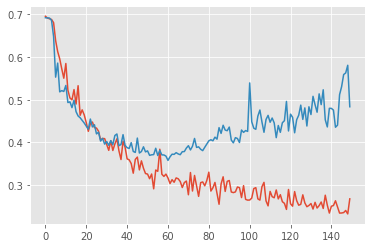

In [112]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

## Conclusion

- WI can say that the accuracy of this model is `85%`.
- When i'm using dropout,activations function as relu and also kernel_initializer is `he_uniform` i got the accuracy of `85%`.

# Applying PCA-Principal component analysis

In [40]:
y = df1['HeartDisease']
X = df1[['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR',
        'ExerciseAngina','Oldpeak','ST_Slope']]

In [41]:
X.head()
y

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


0      0
1      1
2      0
3      1
4      0
      ..
899    1
900    1
901    1
902    1
903    0
Name: HeartDisease, Length: 904, dtype: int64

In [42]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(X)
print(standardized_data.shape)

(904, 11)


In [43]:
from sklearn.decomposition import PCA
pca = PCA()

In [44]:
pca.fit(standardized_data)

PCA()

In [45]:
pca.components_

array([[ 3.28139725e-01,  2.22327623e-01, -2.85278440e-01,
         1.56202490e-01, -1.81039098e-01,  2.07001717e-01,
         1.06016926e-01, -4.07114402e-01,  4.22359283e-01,
         3.57750064e-01, -4.22057673e-01],
       [-8.03646616e-02,  2.44466430e-01, -6.35211699e-03,
        -2.53116690e-01, -6.01989503e-01,  3.45907662e-01,
         4.12578560e-01, -1.53932309e-01, -2.09922072e-01,
        -3.59933780e-01,  1.41739125e-01],
       [ 5.18190614e-01, -2.21715582e-01,  4.05939646e-01,
         5.68188572e-01, -1.84719760e-02,  3.28930902e-01,
         1.84562967e-02, -5.26420270e-02, -2.41948679e-01,
        -9.10987234e-02,  1.27313505e-01],
       [ 5.29656933e-02,  1.82802496e-01,  3.09020327e-01,
        -3.52527642e-01, -1.78326256e-01,  3.88433336e-01,
        -5.91845980e-01,  2.43239620e-01, -1.51868166e-01,
         2.21155412e-01, -2.82678331e-01],
       [ 1.68815923e-01, -8.30786121e-01, -9.37370580e-02,
        -4.34189796e-01, -9.91261672e-02,  4.60912673e-02,
  

In [46]:
pca.explained_variance_ratio_

array([0.25133059, 0.12996116, 0.1052735 , 0.09256816, 0.07989148,
       0.07736917, 0.07320472, 0.05631075, 0.05062844, 0.0453237 ,
       0.03813834])

In [47]:
np.cumsum(pca.explained_variance_ratio_)

array([0.25133059, 0.38129175, 0.48656525, 0.57913341, 0.65902489,
       0.73639406, 0.80959878, 0.86590952, 0.91653796, 0.96186166,
       1.        ])

In [48]:
np.arange(len(pca.explained_variance_ratio_))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [49]:
# configuring the parameteres
pca_new = PCA(n_components = 11)
pca_new_data = pca_new.fit_transform(standardized_data)
print("shape = ", pca_new_data.shape)

shape =  (904, 11)


In [50]:
pca = pd.DataFrame(data=pca_new_data, columns=('col_1', 'col_2','col_3','col_4','col_5','col_6','col_7','col_8',
                                                  'col_9','col_10','col_11'))
pca["HeartDisease"] = y.values

pca.head()

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,HeartDisease
0,-2.263100,-0.138697,-0.380357,-0.464053,-1.399413,0.197382,-0.556898,0.030488,-0.071794,0.254548,0.140213,0
1,-1.113186,-1.009654,1.445619,-0.196581,0.753718,1.293654,0.092116,1.537326,-0.495658,0.776825,0.119670,1
2,-1.093086,1.161566,-0.671455,-1.927718,-0.595091,0.247199,0.472280,-0.927136,-1.027795,0.710769,-1.381197,0
3,1.016972,-1.194696,-0.586808,-1.135931,1.695110,0.148027,-0.310412,0.876336,-0.744765,-0.147233,-0.649180,1
4,-1.036871,0.415298,1.241370,-0.577908,-1.035592,-0.427531,1.060168,0.095258,-0.428944,0.090671,-0.503994,0


# Model building -  using first 2 feauters of pca

In [51]:
y=pca['HeartDisease']
X=pca[["col_1", "col_2"]]

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [53]:
#Standardization
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_trans = std.fit_transform(X_train)
X_test_trans = std.transform(X_test)

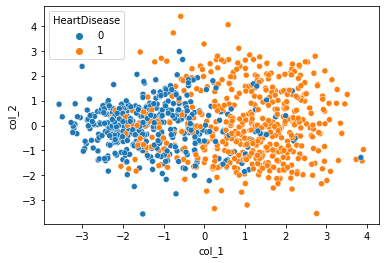

In [54]:
sns.scatterplot(x='col_1',y='col_2',hue='HeartDisease',data=pca);

In [219]:
model = Sequential()
model.add(Dense(70,activation='relu',kernel_initializer='he_uniform',input_dim=2))
model.add(Dropout(0.25))
model.add(Dense(65,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.25))
#model.add(Dense(50,activation='relu'))
#model.add(Dropout(0.25))
#model.add(Dense(45,activation='relu'))
model.add(Dense(10,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.25))
model.add(Dense(2,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='sigmoid'))

In [220]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_95 (Dense)            (None, 70)                210       
                                                                 
 dropout_38 (Dropout)        (None, 70)                0         
                                                                 
 dense_96 (Dense)            (None, 65)                4615      
                                                                 
 dropout_39 (Dropout)        (None, 65)                0         
                                                                 
 dense_97 (Dense)            (None, 10)                660       
                                                                 
 dropout_40 (Dropout)        (None, 10)                0         
                                                                 
 dense_98 (Dense)            (None, 2)               

# Compile the model

In [221]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [222]:
history = model.fit(X_train,y_train,batch_size=10,epochs=250,validation_split=0.2)

Epoch 1/250
59/59 [==============================] - 1s 6ms/step - loss: 0.5790 - accuracy: 0.7496 - val_loss: 0.3907 - val_accuracy: 0.8503
Epoch 2/250
59/59 [==============================] - 0s 4ms/step - loss: 0.5343 - accuracy: 0.7768 - val_loss: 0.3768 - val_accuracy: 0.8503
Epoch 3/250
59/59 [==============================] - 0s 4ms/step - loss: 0.5076 - accuracy: 0.7598 - val_loss: 0.4086 - val_accuracy: 0.8435
Epoch 4/250
59/59 [==============================] - 0s 4ms/step - loss: 0.5010 - accuracy: 0.7956 - val_loss: 0.3799 - val_accuracy: 0.8435
Epoch 5/250
59/59 [==============================] - 0s 4ms/step - loss: 0.4859 - accuracy: 0.7717 - val_loss: 0.3844 - val_accuracy: 0.8503
Epoch 6/250
59/59 [==============================] - 0s 4ms/step - loss: 0.4924 - accuracy: 0.8041 - val_loss: 0.3775 - val_accuracy: 0.8435
Epoch 7/250
59/59 [==============================] - 0s 4ms/step - loss: 0.5024 - accuracy: 0.8092 - val_loss: 0.4013 - val_accuracy: 0.8435
Epoch 8/250
5

Epoch 59/250
59/59 [==============================] - 0s 4ms/step - loss: 0.4204 - accuracy: 0.8296 - val_loss: 0.3870 - val_accuracy: 0.8503
Epoch 60/250
59/59 [==============================] - 0s 4ms/step - loss: 0.4268 - accuracy: 0.8382 - val_loss: 0.3887 - val_accuracy: 0.8503
Epoch 61/250
59/59 [==============================] - 0s 4ms/step - loss: 0.4201 - accuracy: 0.8399 - val_loss: 0.3772 - val_accuracy: 0.8503
Epoch 62/250
59/59 [==============================] - 0s 4ms/step - loss: 0.4057 - accuracy: 0.8399 - val_loss: 0.3784 - val_accuracy: 0.8571
Epoch 63/250
59/59 [==============================] - 0s 3ms/step - loss: 0.4270 - accuracy: 0.8279 - val_loss: 0.3764 - val_accuracy: 0.8639
Epoch 64/250
59/59 [==============================] - 0s 3ms/step - loss: 0.4304 - accuracy: 0.8313 - val_loss: 0.3792 - val_accuracy: 0.8503
Epoch 65/250
59/59 [==============================] - 0s 4ms/step - loss: 0.4199 - accuracy: 0.8279 - val_loss: 0.3798 - val_accuracy: 0.8571
Epoch 

59/59 [==============================] - 0s 3ms/step - loss: 0.4105 - accuracy: 0.8296 - val_loss: 0.3865 - val_accuracy: 0.8571
Epoch 174/250
59/59 [==============================] - 0s 3ms/step - loss: 0.4052 - accuracy: 0.8365 - val_loss: 0.3775 - val_accuracy: 0.8503
Epoch 175/250
59/59 [==============================] - 0s 4ms/step - loss: 0.3936 - accuracy: 0.8365 - val_loss: 0.3834 - val_accuracy: 0.8503
Epoch 176/250
59/59 [==============================] - 0s 4ms/step - loss: 0.4075 - accuracy: 0.8416 - val_loss: 0.3961 - val_accuracy: 0.8571
Epoch 177/250
59/59 [==============================] - 0s 3ms/step - loss: 0.4162 - accuracy: 0.8399 - val_loss: 0.3813 - val_accuracy: 0.8503
Epoch 178/250
59/59 [==============================] - 0s 3ms/step - loss: 0.3949 - accuracy: 0.8365 - val_loss: 0.3781 - val_accuracy: 0.8503
Epoch 179/250
59/59 [==============================] - 0s 4ms/step - loss: 0.4112 - accuracy: 0.8382 - val_loss: 0.3875 - val_accuracy: 0.8571
Epoch 180/250

In [223]:
y_cap= model.predict(X_test_trans)

6/6 [==============================] - 0s 2ms/step


In [224]:
y_cap_f = np.where(y_cap>0.5,1,0)

In [225]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_cap_f)

0.842391304347826

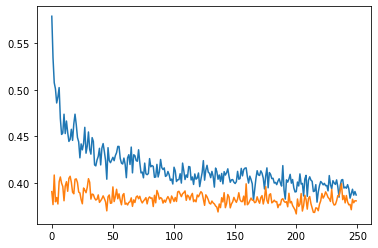

In [226]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [83]:
from mlxtend.plotting import plot_decision_regions

3888/3888 [==============================] - 7s 2ms/step


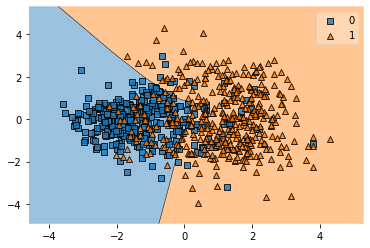

In [227]:
plot_decision_regions(X_train.values, y_train.values.astype(int), clf = model);

3888/3888 [==============================] - 7s 2ms/step


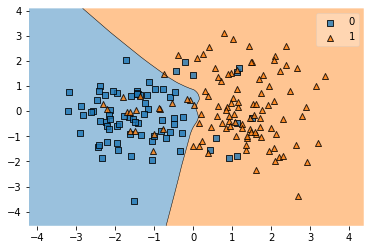

In [228]:
plot_decision_regions(X_test.values, y_test.values.astype(int), clf = model);

## Conclusion 

- After doing `PCA` build the model using first two features of `PCA`.
- Then the accuracy of the model is `84` only with two inputs.
- We can see that the best decision surface.